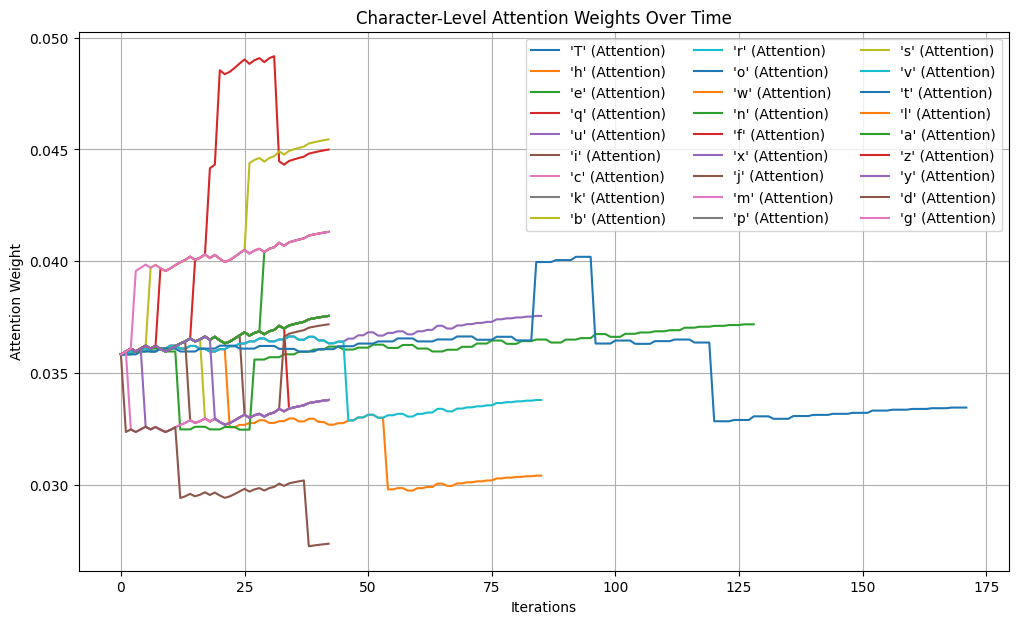

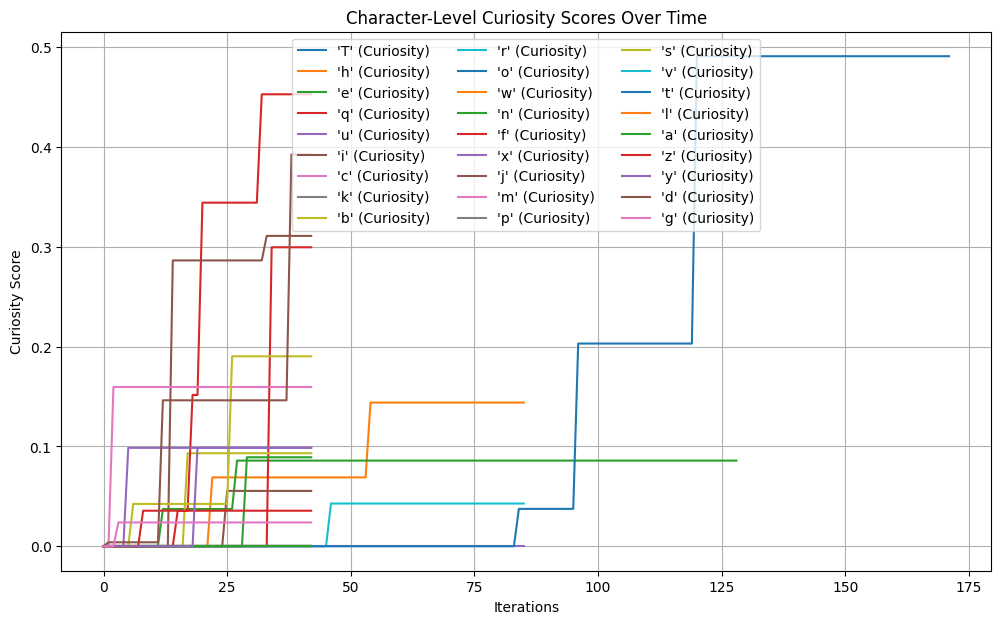

Focus Sequence (Characters): [np.str_(' '), np.str_('d'), np.str_('m'), np.str_('g'), np.str_('e'), np.str_('x'), np.str_('s'), np.str_(' '), np.str_('z'), np.str_('e'), np.str_(' '), np.str_('h'), np.str_('d'), np.str_(' '), np.str_('j'), np.str_('f'), np.str_(' '), np.str_('b'), np.str_('f'), np.str_('y'), np.str_('f'), np.str_('o'), np.str_(' '), np.str_('r'), np.str_('o'), np.str_('i'), np.str_('s'), np.str_('h'), np.str_(' '), np.str_('n'), np.str_('o'), np.str_(' '), np.str_('f'), np.str_('j'), np.str_('q'), np.str_(' '), np.str_(' '), np.str_(' '), np.str_('d'), np.str_(' '), np.str_(' '), np.str_(' '), np.str_(' ')]


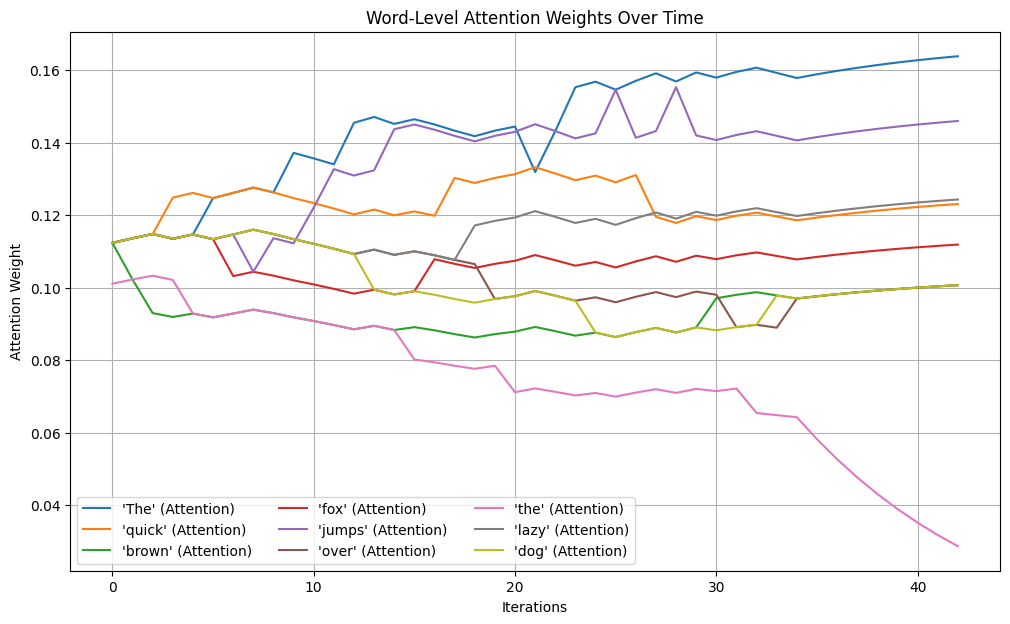

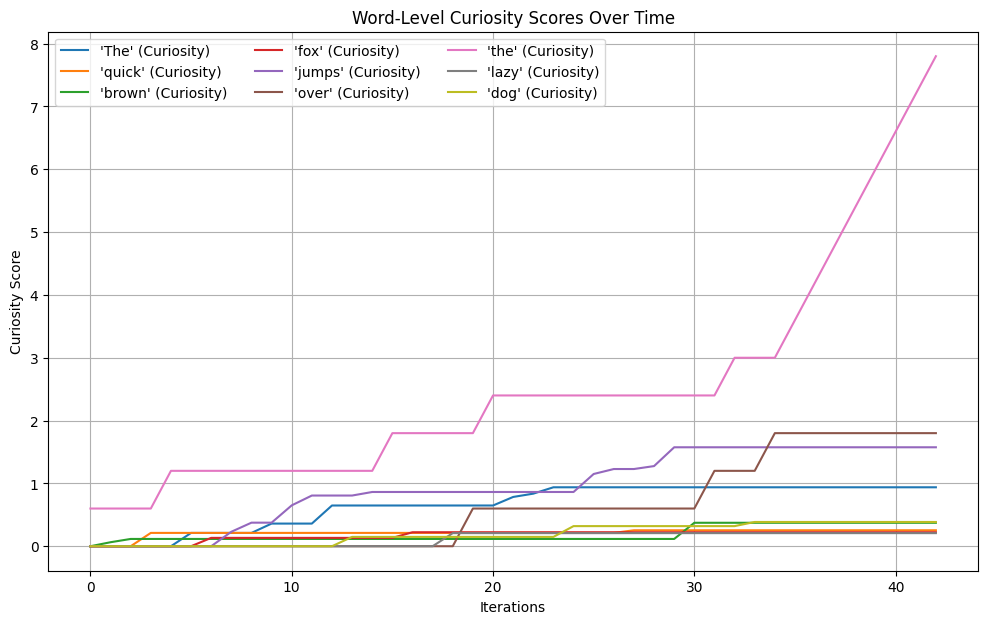

Focus Sequence (Words): [np.str_('the'), np.str_('brown'), np.str_('brown'), np.str_('quick'), np.str_('the'), np.str_('The'), np.str_('fox'), np.str_('jumps'), np.str_('jumps'), np.str_('The'), np.str_('jumps'), np.str_('jumps'), np.str_('The'), np.str_('dog'), np.str_('jumps'), np.str_('the'), np.str_('fox'), np.str_('quick'), np.str_('lazy'), np.str_('over'), np.str_('the'), np.str_('The'), np.str_('The'), np.str_('The'), np.str_('dog'), np.str_('jumps'), np.str_('jumps'), np.str_('quick'), np.str_('jumps'), np.str_('jumps'), np.str_('brown'), np.str_('over'), np.str_('the'), np.str_('dog'), np.str_('over'), np.str_('the'), np.str_('the'), np.str_('the'), np.str_('the'), np.str_('the'), np.str_('the'), np.str_('the'), np.str_('the')]


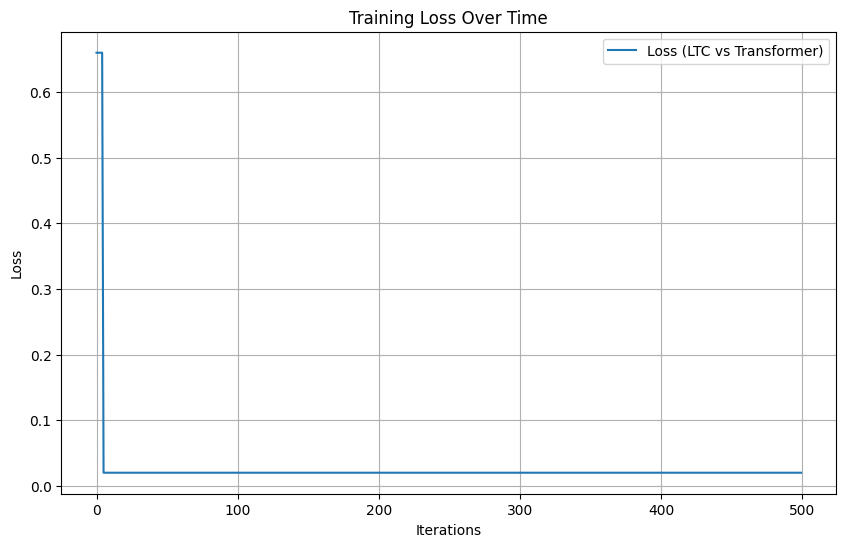

Final LTC Predictions: {'The': np.float64(0.2), 'quick': np.float64(0.2), 'brown': np.float64(0.2), 'fox': np.float64(0.2), 'jumps': np.float64(0.2)}


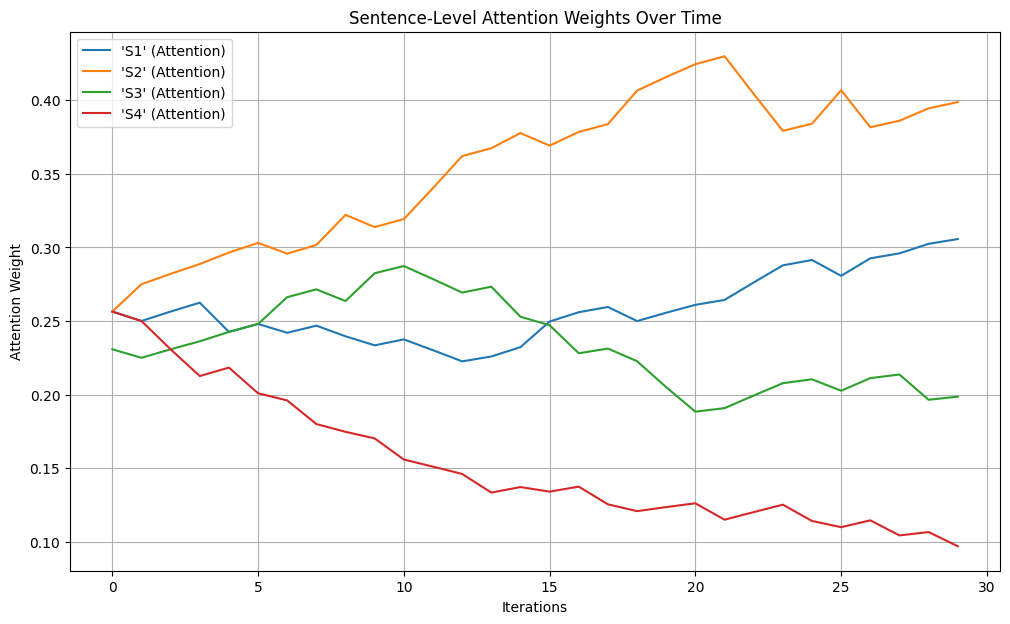

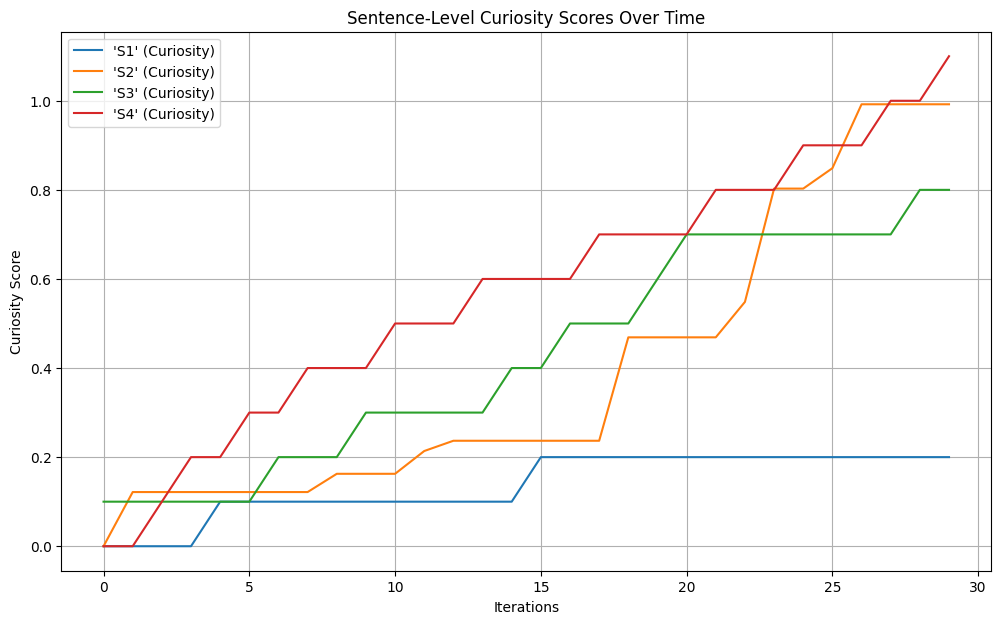

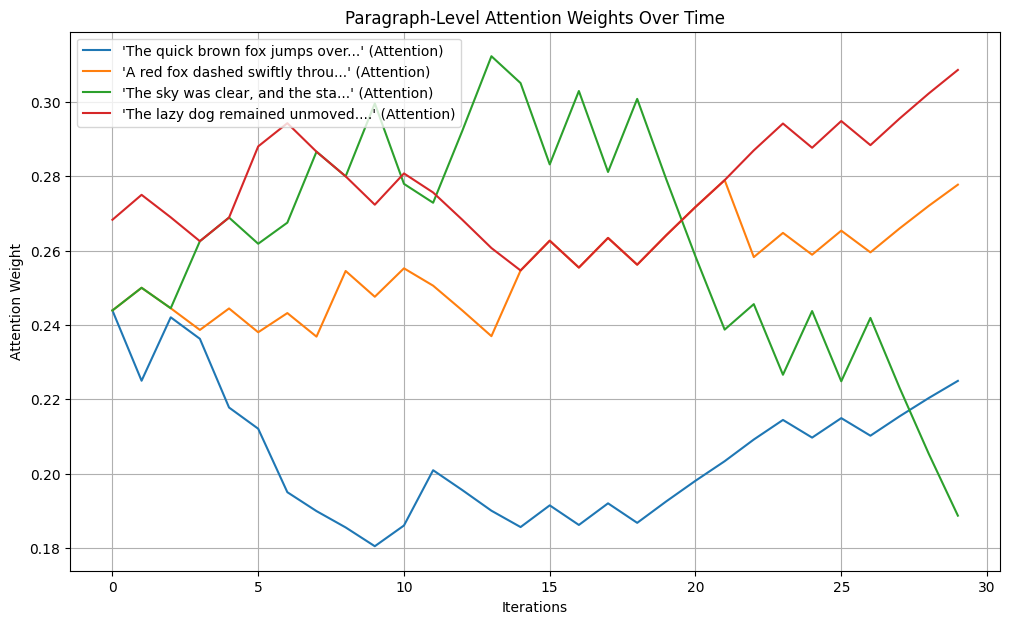

Focus Sequence (Paragraphs): [np.str_('The lazy dog remained unmoved.'), np.str_('The quick brown fox jumps over the lazy dog.'), np.str_('The quick brown fox jumps over the lazy dog.'), np.str_('The sky was clear, and the stars sparkled like diamonds.'), np.str_('The quick brown fox jumps over the lazy dog.'), np.str_('The lazy dog remained unmoved.'), np.str_('The quick brown fox jumps over the lazy dog.'), np.str_('The sky was clear, and the stars sparkled like diamonds.'), np.str_('A red fox dashed swiftly through the forest.'), np.str_('The sky was clear, and the stars sparkled like diamonds.'), np.str_('The sky was clear, and the stars sparkled like diamonds.'), np.str_('The quick brown fox jumps over the lazy dog.'), np.str_('The sky was clear, and the stars sparkled like diamonds.'), np.str_('The sky was clear, and the stars sparkled like diamonds.'), np.str_('A red fox dashed swiftly through the forest.'), np.str_('The sky was clear, and the stars sparkled like diamonds.'), np

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MotorNeuronWithCuriosity:
    def __init__(self, threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5):
        """
        Motor Neuron for managing focus and curiosity in attention mechanisms.
        
        Args:
        - threshold_time (float): Maximum time allowed to focus on a token before disengaging.
        - decay_rate (float): Rate at which attention strength decays for high-cost inputs.
        - focus_strength (float): Initial strength of focus (can adapt over time).
        - curiosity_weight (float): Weight for curiosity in engagement score.
        """
        self.threshold_time = threshold_time
        self.decay_rate = decay_rate
        self.focus_strength = focus_strength
        self.curiosity_weight = curiosity_weight  # Weight for curiosity in engagement score
        self.focus_history = []
        self.attention_weights = {}  # Dynamic weights for tokens
        self.novelty_scores = {}  # Tracks curiosity for each token

    def initialize_tokens(self, tokens):
        """
        Initialize attention weights and curiosity scores for a list of tokens.
        
        Args:
        - tokens (list): List of tokens to initialize.
        """
        for token in tokens:
            self.attention_weights[token] = self.focus_strength
            self.novelty_scores[token] = 0.0

    def update_focus(self, token_id, focus_time):
        """
        Updates focus strength and attention weights based on focus time.
        
        Args:
        - token_id (str): Identifier for the token being processed.
        - focus_time (float): Time taken to process the token.
        """
        if focus_time > self.threshold_time:
            self.attention_weights[token_id] *= (1 - self.decay_rate)
        else:
            self.attention_weights[token_id] *= (1 + self.decay_rate)
        
        self.focus_history.append((token_id, focus_time))
        self._normalize_weights()

    def update_curiosity(self, token_id, prediction_error):
        """
        Updates curiosity scores based on prediction error.
        
        Args:
        - token_id (str): Identifier for the token being processed.
        - prediction_error (float): Error in the model's prediction for the token.
        """
        self.novelty_scores[token_id] += prediction_error  # Increment curiosity for high error

    def decide_next_focus(self, candidates, temperature=0.5):
        """
        Decides the next token to focus on, balancing boredom and curiosity.
        
        Args:
        - candidates (list): List of candidate tokens to focus on.
        - temperature (float): Temperature parameter for Boltzmann sampling.

        Returns:
        - next_focus (str): The token selected for the next focus.
        """
        engagement_scores = []
        for token in candidates:
            attention_weight = self.attention_weights.get(token, 1.0)
            curiosity_score = self.novelty_scores.get(token, 0.0)
            engagement_score = (1 - attention_weight) + self.curiosity_weight * curiosity_score
            engagement_scores.append(engagement_score)
        
        # Convert engagement scores to probabilities
        probabilities = np.exp(np.array(engagement_scores) / temperature)
        probabilities /= probabilities.sum()
        
        return np.random.choice(candidates, p=probabilities)

    def _normalize_weights(self):
        """Keeps attention weights bounded to avoid runaway effects."""
        total_weight = sum(self.attention_weights.values())
        if total_weight > 0:
            for token_id in self.attention_weights:
                self.attention_weights[token_id] /= total_weight


# Define a sentence as a continuous stream of characters
character_stream = list("The quick brown fox jumps over the lazy dog")

# Initialize MotorNeuronWithCuriosity for characters
motor_neuron_characters = MotorNeuronWithCuriosity(threshold_time=0.8, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_characters.initialize_tokens(character_stream)

# Track attention and curiosity scores for characters
character_attention = {char: [] for char in character_stream}
character_curiosity = {char: [] for char in character_stream}
focus_sequence_characters = []

# Simulate character-level processing
num_iterations = len(character_stream)
for i in range(num_iterations):
    # Decide the next character to focus on
    current_char = motor_neuron_characters.decide_next_focus(character_stream, temperature=0.5)
    focus_sequence_characters.append(current_char)
    
    # Update character-level focus and curiosity
    focus_time = np.random.uniform(0.5, 1.5) if current_char != " " else 1.2  # Spaces take longer, causing boredom
    prediction_error = np.random.uniform(0.0, 0.3) if current_char.isalpha() else 0.1  # Letters are more curious
    motor_neuron_characters.update_focus(current_char, focus_time)
    motor_neuron_characters.update_curiosity(current_char, prediction_error)
    
    # Record character-level attention and curiosity
    for char in character_stream:
        if char not in character_attention:
            character_attention[char] = []
        character_attention[char].append(motor_neuron_characters.attention_weights.get(char, motor_neuron_characters.focus_strength))
        if char not in character_curiosity:
            character_curiosity[char] = []
        character_curiosity[char].append(motor_neuron_characters.novelty_scores.get(char, 0.0))

# Plot character-level attention
plt.figure(figsize=(12, 7))
for char, weights in character_attention.items():
    if char.strip():  # Skip plotting spaces for clarity
        plt.plot(range(len(weights)), weights, label=f"'{char}' (Attention)")
plt.title("Character-Level Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Plot character-level curiosity
plt.figure(figsize=(12, 7))
for char, curiosities in character_curiosity.items():
    if char.strip():  # Skip plotting spaces for clarity
        plt.plot(range(len(curiosities)), curiosities, label=f"'{char}' (Curiosity)")
plt.title("Character-Level Curiosity Scores Over Time")
plt.xlabel("Iterations")
plt.ylabel("Curiosity Score")
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Print focus sequence for characters
print("Focus Sequence (Characters):", focus_sequence_characters)
# Define a sentence as a continuous stream of characters
character_stream = list("The quick brown fox jumps over the lazy dog")

# Initialize MotorNeuronWithCuriosity for characters
motor_neuron_characters = MotorNeuronWithCuriosity(threshold_time=0.8, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_characters.initialize_tokens(character_stream)

# Simulate character-level processing to derive word boundaries
character_attention = {char: [] for char in character_stream}
focus_sequence_characters = []

num_iterations = len(character_stream)
for _ in range(num_iterations):
    current_char = motor_neuron_characters.decide_next_focus(character_stream, temperature=0.5)
    focus_sequence_characters.append(current_char)

    # Simulate character-level dynamics
    focus_time = np.random.uniform(0.5, 1.5) if current_char != " " else 1.2
    prediction_error = np.random.uniform(0.0, 0.3) if current_char.isalpha() else 0.1
    motor_neuron_characters.update_focus(current_char, focus_time)
    motor_neuron_characters.update_curiosity(current_char, prediction_error)

    # Record attention weights
    for char in character_stream:
        character_attention[char].append(motor_neuron_characters.attention_weights.get(char, motor_neuron_characters.focus_strength))

# Group characters into words based on attention and spaces
word_list = []
current_word = ""
for char in character_stream:
    if char == " ":
        if current_word:
            word_list.append(current_word)
            current_word = ""
    else:
        current_word += char
if current_word:
    word_list.append(current_word)

# Initialize MotorNeuronWithCuriosity for words
motor_neuron_words = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_words.initialize_tokens(word_list)

# Track word-level attention and curiosity
word_attention = {word: [] for word in word_list}
word_curiosity = {word: [] for word in word_list}
focus_sequence_words = []

# Simulate word-level processing
for _ in range(num_iterations):
    current_word = motor_neuron_words.decide_next_focus(word_list, temperature=0.5)
    focus_sequence_words.append(current_word)

    # Simulate word-level dynamics
    focus_time = np.random.uniform(0.5, 1.5) if current_word != "the" else 1.2
    prediction_error = np.random.uniform(0.0, 0.3) if current_word not in ["the", "over"] else 0.6
    motor_neuron_words.update_focus(current_word, focus_time)
    motor_neuron_words.update_curiosity(current_word, prediction_error)

    # Record attention weights and curiosity
    for word in word_list:
        word_attention[word].append(motor_neuron_words.attention_weights.get(word, motor_neuron_words.focus_strength))
        word_curiosity[word].append(motor_neuron_words.novelty_scores.get(word, 0.0))

# Plot word-level attention
plt.figure(figsize=(12, 7))
for word, weights in word_attention.items():
    plt.plot(range(num_iterations), weights, label=f"'{word}' (Attention)")
plt.title("Word-Level Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Plot word-level curiosity
plt.figure(figsize=(12, 7))
for word, curiosities in word_curiosity.items():
    plt.plot(range(num_iterations), curiosities, label=f"'{word}' (Curiosity)")
plt.title("Word-Level Curiosity Scores Over Time")
plt.xlabel("Iterations")
plt.ylabel("Curiosity Score")
plt.legend(ncol=3)
plt.grid(True)
plt.show()

# Print focus sequence for words
print("Focus Sequence (Words):", focus_sequence_words)
# Simulate transformer outputs for training
tokens = ["The", "quick", "brown", "fox", "jumps"]
transformer_predictions = {
    "The": [0.1, 0.2, 0.3, 0.4, 0.0],
    "quick": [0.2, 0.3, 0.1, 0.4, 0.0],
    "brown": [0.3, 0.2, 0.1, 0.4, 0.0],
    "fox": [0.4, 0.3, 0.2, 0.1, 0.0],
    "jumps": [0.0, 0.1, 0.2, 0.3, 0.4],
}

# Initialize MotorNeuronWithCuriosity for LTC training
motor_neuron_ltc = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_ltc.initialize_tokens(tokens)

# Train LTC to mimic transformer predictions
ltc_predictions = {token: [] for token in tokens}
losses = []

num_iterations = 100
for _ in range(num_iterations):
    for token in tokens:
        # Get current LTC prediction
        current_prediction = motor_neuron_ltc.attention_weights[token]
        
        # Calculate loss against transformer prediction
        target_prediction = transformer_predictions[token]
        loss = np.mean((np.array(target_prediction) - current_prediction) ** 2)
        losses.append(loss)
        
        # Update LTC weights (simplified learning rule)
        motor_neuron_ltc.attention_weights[token] += 0.1 * (np.mean(target_prediction) - current_prediction)

    # Normalize LTC weights after each iteration
    motor_neuron_ltc._normalize_weights()

# Plot losses over time
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Loss (LTC vs Transformer)")
plt.title("Training Loss Over Time")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Print final LTC predictions
print("Final LTC Predictions:", {token: motor_neuron_ltc.attention_weights[token] for token in tokens})
# Define a paragraph with sentences
paragraph_sentences = {
    "S1": "The quick brown fox jumps over the lazy dog.",
    "S2": "A red fox dashed swiftly through the forest.",
    "S3": "The sky was clear, and the stars sparkled like diamonds.",
    "S4": "The lazy dog remained unmoved by the excitement.",
}

# Initialize MotorNeuronWithCuriosity for sentences
motor_neuron_sentences = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_sentences.initialize_tokens(list(paragraph_sentences.keys()))

# Track attention and curiosity scores
sentence_attention = {s: [] for s in paragraph_sentences.keys()}
sentence_curiosity = {s: [] for s in paragraph_sentences.keys()}
focus_sequence_sentences = []

num_iterations = 30
for _ in range(num_iterations):
    # Decide which sentence to focus on
    current_sentence = motor_neuron_sentences.decide_next_focus(list(paragraph_sentences.keys()), temperature=0.5)
    focus_sequence_sentences.append(current_sentence)
    
    # Simulate focus time and prediction error
    focus_time = np.random.uniform(0.5, 1.5) if current_sentence != "S4" else 1.2
    prediction_error = np.random.uniform(0.0, 0.3) if current_sentence == "S2" else 0.1
    motor_neuron_sentences.update_focus(current_sentence, focus_time)
    motor_neuron_sentences.update_curiosity(current_sentence, prediction_error)
    
    # Record sentence-level attention and curiosity
    for s in paragraph_sentences.keys():
        sentence_attention[s].append(motor_neuron_sentences.attention_weights[s])
        sentence_curiosity[s].append(motor_neuron_sentences.novelty_scores[s])

# Plot sentence-level attention
plt.figure(figsize=(12, 7))
for sentence, weights in sentence_attention.items():
    plt.plot(range(num_iterations), weights, label=f"'{sentence}' (Attention)")
plt.title("Sentence-Level Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend()
plt.grid(True)
plt.show()

# Plot sentence-level curiosity
plt.figure(figsize=(12, 7))
for sentence, curiosities in sentence_curiosity.items():
    plt.plot(range(num_iterations), curiosities, label=f"'{sentence}' (Curiosity)")
plt.title("Sentence-Level Curiosity Scores Over Time")
plt.xlabel("Iterations")
plt.ylabel("Curiosity Score")
plt.legend()
plt.grid(True)
plt.show()

# Print focus sequence
# Define a multi-paragraph text with newlines
text_stream = list("The quick brown fox jumps over the lazy dog.\nA red fox dashed swiftly through the forest.\nThe sky was clear, and the stars sparkled like diamonds.\n\nThe lazy dog remained unmoved.")

# Initialize MotorNeuronWithCuriosity for characters
motor_neuron_characters = MotorNeuronWithCuriosity(threshold_time=0.8, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_characters.initialize_tokens(text_stream)

# Track attention and curiosity scores for characters
character_attention = {char: [] for char in text_stream}
focus_sequence_characters = []

# Simulate character-level processing
num_iterations = len(text_stream)
for i in range(num_iterations):
    current_char = motor_neuron_characters.decide_next_focus(text_stream, temperature=0.5)
    focus_sequence_characters.append(current_char)

    # Update character-level dynamics
    focus_time = np.random.uniform(0.5, 1.5) if current_char != "\n" else 1.2  # Newlines cause boredom
    prediction_error = np.random.uniform(0.0, 0.3) if current_char.isalpha() else 0.1
    motor_neuron_characters.update_focus(current_char, focus_time)
    motor_neuron_characters.update_curiosity(current_char, prediction_error)

    # Record attention weights
    for char in text_stream:
        character_attention[char].append(motor_neuron_characters.attention_weights.get(char, motor_neuron_characters.focus_strength))

# Group sentences into paragraphs based on attention and newlines
paragraphs = []
current_paragraph = []
for char in text_stream:
    if char == "\n":
        if current_paragraph:
            paragraphs.append("".join(current_paragraph))
            current_paragraph = []
    else:
        current_paragraph.append(char)
if current_paragraph:
    paragraphs.append("".join(current_paragraph))

# Track paragraph-level attention
motor_neuron_paragraphs = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_paragraphs.initialize_tokens(paragraphs)

paragraph_attention = {p: [] for p in paragraphs}
focus_sequence_paragraphs = []

# Simulate paragraph-level processing
for _ in range(30):
    current_paragraph = motor_neuron_paragraphs.decide_next_focus(paragraphs, temperature=0.5)
    focus_sequence_paragraphs.append(current_paragraph)

    # Simulate paragraph-level dynamics
    focus_time = np.random.uniform(0.5, 1.5)
    prediction_error = np.random.uniform(0.0, 0.3)
    motor_neuron_paragraphs.update_focus(current_paragraph, focus_time)
    motor_neuron_paragraphs.update_curiosity(current_paragraph, prediction_error)

    # Record paragraph-level attention
    for p in paragraphs:
        paragraph_attention[p].append(motor_neuron_paragraphs.attention_weights.get(p, motor_neuron_paragraphs.focus_strength))

# Plot paragraph-level attention
plt.figure(figsize=(12, 7))
for paragraph, weights in paragraph_attention.items():
    plt.plot(range(len(weights)), weights, label=f"'{paragraph[:30]}...' (Attention)")
plt.title("Paragraph-Level Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend()
plt.grid(True)
plt.show()

# Print focus sequence for paragraphs
print("Focus Sequence (Paragraphs):", focus_sequence_paragraphs)
# Define sentences and their relationships (mock causal graph)
causal_graph = {
    "S1": {"supports": ["S2"]},
    "S2": {"elaborates": ["S1"], "leads_to": ["S3"]},
    "S3": {"introduces": ["S4"]},
    "S4": {"concludes": ["S1"]},
}

# Define input sentences
sentences = ["S1", "S2", "S3", "S4"]

# Initialize MotorNeuronWithCuriosity for sentences
motor_neuron_pfc = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5)
motor_neuron_pfc.initialize_tokens(sentences)

# Track PFC-driven inference
processed_sentences = []
focus_sequence_pfc = []

# Simulate goal-oriented inference
for _ in range(20):
    # Decide which sentence to focus on
    current_sentence = motor_neuron_pfc.decide_next_focus(sentences, temperature=0.5)
    focus_sequence_pfc.append(current_sentence)

    # Check if attention goal is met for current_sentence
    related_sentences = causal_graph.get(current_sentence, {}).get("supports", [])
    if all(sentence in processed_sentences for sentence in related_sentences):
        # If goal is met, terminate inference for this sentence
        if current_sentence not in processed_sentences:
            processed_sentences.append(current_sentence)
        continue

    # Update PFC focus with feedback
    focus_time = np.random.uniform(0.5, 1.5)
    prediction_error = np.random.uniform(0.0, 0.3)
    motor_neuron_pfc.update_focus(current_sentence, focus_time)
    motor_neuron_pfc.update_curiosity(current_sentence, prediction_error)

# Print focus sequence and processed sentences
print("Focus Sequence (PFC):", focus_sequence_pfc)
print("Processed Sentences:", processed_sentences)



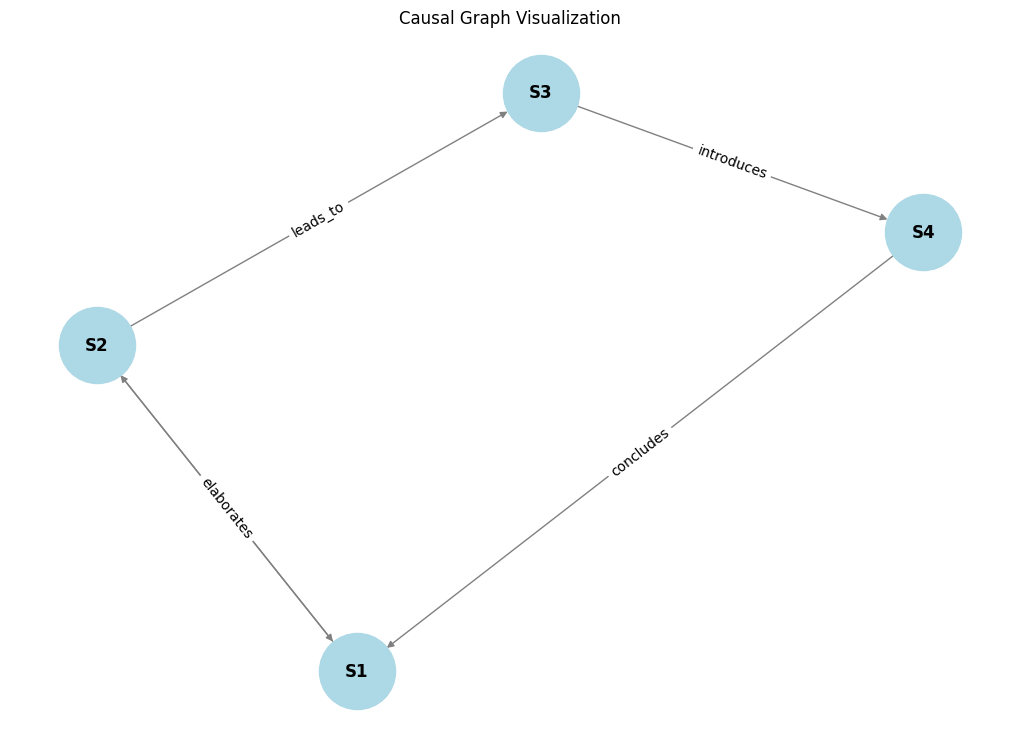

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the causal graph
causal_graph = {
    "S1": {"supports": ["S2"]},
    "S2": {"elaborates": ["S1"], "leads_to": ["S3"]},
    "S3": {"introduces": ["S4"]},
    "S4": {"concludes": ["S1"]},
}

# Initialize the graph
G = nx.DiGraph()

# Add nodes and edges
for source, relations in causal_graph.items():
    for relation, targets in relations.items():
        for target in targets:
            G.add_edge(source, target, label=relation)

# Plot the causal graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=12, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Causal Graph Visualization")
plt.show()


In [9]:
# Define a longer causal graph
extended_causal_graph = {
    "S1": {"supports": ["S2"]},
    "S2": {"elaborates": ["S3"], "leads_to": ["S4"]},
    "S3": {"introduces": ["S5"], "leads_to": ["S6"]},
    "S4": {"concludes": ["S1"]},
    "S5": {"concludes": ["S3"]},
    "S6": {"elaborates": ["S4"]},
}

# Define sentence mappings for summaries
extended_sentence_map = {
    "S1": "The fox began its journey through the woods.",
    "S2": "It encountered a flowing river.",
    "S3": "The sky turned dark, and a storm approached.",
    "S4": "The fox found shelter under a tree.",
    "S5": "When the storm cleared, the sun rose brightly.",
    "S6": "The journey continued, full of challenges and discoveries.",
}

# Initialize MotorNeuronWithCuriosity for sentences
motor_neuron_extended = MotorNeuronWithCuriosity(
    threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5
)
motor_neuron_extended.initialize_tokens(list(extended_causal_graph.keys()))

# Track focus and processed sentences
focus_sequence_extended = []
processed_sentences_extended = []

# Simulate causal inference and processing
num_iterations = 50
for _ in range(num_iterations):
    current_sentence = motor_neuron_extended.decide_next_focus(
        list(extended_causal_graph.keys()), temperature=0.5
    )
    focus_sequence_extended.append(current_sentence)

    # Check causal relationships
    related_sentences = extended_causal_graph.get(current_sentence, {}).get("supports", [])
    if all(sentence in processed_sentences_extended for sentence in related_sentences):
        if current_sentence not in processed_sentences_extended:
            processed_sentences_extended.append(current_sentence)
        continue

    # Update focus with feedback
    focus_time = np.random.uniform(0.5, 1.5)
    prediction_error = np.random.uniform(0.0, 0.3)
    motor_neuron_extended.update_focus(current_sentence, focus_time)
    motor_neuron_extended.update_curiosity(current_sentence, prediction_error)

# Generate a summary based on processed sentences
summary_extended = " ".join(
    [extended_sentence_map[sentence] for sentence in processed_sentences_extended]
)

# Print focus sequence and generated summary
print("Focus Sequence (Extended):", focus_sequence_extended)
print("Generated Summary (Extended):", summary_extended)


Focus Sequence (Extended): [np.str_('S2'), np.str_('S2'), np.str_('S3'), np.str_('S4'), np.str_('S5'), np.str_('S5'), np.str_('S4'), np.str_('S1'), np.str_('S4'), np.str_('S1'), np.str_('S1'), np.str_('S3'), np.str_('S4'), np.str_('S1'), np.str_('S3'), np.str_('S3'), np.str_('S4'), np.str_('S2'), np.str_('S6'), np.str_('S1'), np.str_('S5'), np.str_('S6'), np.str_('S6'), np.str_('S4'), np.str_('S2'), np.str_('S1'), np.str_('S3'), np.str_('S3'), np.str_('S4'), np.str_('S4'), np.str_('S3'), np.str_('S5'), np.str_('S5'), np.str_('S6'), np.str_('S3'), np.str_('S2'), np.str_('S4'), np.str_('S3'), np.str_('S5'), np.str_('S6'), np.str_('S3'), np.str_('S3'), np.str_('S6'), np.str_('S2'), np.str_('S4'), np.str_('S4'), np.str_('S1'), np.str_('S2'), np.str_('S5'), np.str_('S6')]
Generated Summary (Extended): It encountered a flowing river. The sky turned dark, and a storm approached. The fox found shelter under a tree. When the storm cleared, the sun rose brightly. The fox began its journey throug

In [11]:
import time
import math
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Button, VBox, Output

# Set up inline plotting
%matplotlib inline

# Our text and initial parameters
text = "The quick brown fox"
mode_dropdown = Dropdown(options=['stream', 'visual'], value='stream', description='Mode:')

# Initialize variables
activity_data = []
is_vowel = lambda c: c.lower() in 'aeiou'
patterns_out = Output()
phoneme_out = Output()
chart_out = Output()
display_text_out = Output()

def run_simulation(mode):
    # Reset everything for a new run
    global activity_data
    activity_data = []

    if mode == 'stream':
        # Simulate streaming
        display_text = ""
        for i, char in enumerate(text):
            # Clear output and print the current portion of text
            with display_text_out:
                clear_output(wait=True)
                print(display_text + char + ("" if i == len(text)-1 else "|"))
            # Simulate neural activity
            activity_data.append({
                'char': char,
                'activity': 0.5 + math.sin((i+1)/3)*0.3
            })
            display_text += char
            time.sleep(0.3)
        
        # After streaming completes, show final results
        show_final_results(display_text)
        
    else:
        # Visual mode: show full text at once
        display_text = text
        # Compute activity for all chars at once
        activity_data = []
        for i, char in enumerate(text):
            activity_data.append({
                'char': char,
                'activity': 0.5 + math.sin((i+1)/3)*0.3
            })
        
        with display_text_out:
            clear_output(wait=True)
            print(display_text)
        
        show_final_results(display_text)

def show_final_results(display_text):
    # Show patterns and phoneme info
    with patterns_out:
        clear_output(wait=True)
        print("Pattern Recognition:")
        # In "visual" mode, show words; in "stream" mode, show pairs of characters
        # We know the mode from mode_dropdown.value
        mode = mode_dropdown.value
        if mode == 'visual':
            words = text.split(' ')
            for w in words:
                print(w)
        else:
            # Pairs of characters
            pairs = [display_text[i:i+2] for i in range(0, len(display_text), 2)]
            for p in pairs:
                print(p)

    with phoneme_out:
        clear_output(wait=True)
        print("Phoneme Groups:")
        mode = mode_dropdown.value
        if mode == 'visual':
            words = text.split(' ')
            for w in words:
                print(f"{w} → {len(w)} phonemes")
        else:
            # character-level vowel/consonant mapping
            for c in display_text:
                vc = 'vowel' if is_vowel(c) else 'consonant'
                print(f"{c} → {vc}")

    # Plot the activity
    with chart_out:
        clear_output(wait=True)
        chars = [d['char'] for d in activity_data]
        acts = [d['activity'] for d in activity_data]
        plt.figure(figsize=(6,3))
        plt.plot(chars, acts, marker='o')
        plt.title("Neural Activity")
        plt.xlabel("Character")
        plt.ylabel("Activity")
        plt.ylim([0,1])
        plt.grid(True)
        plt.show()

run_button = Button(description="Run Simulation")

def on_run_clicked(b):
    run_simulation(mode_dropdown.value)

run_button.on_click(on_run_clicked)

ui = VBox([mode_dropdown, run_button, display_text_out, chart_out, patterns_out, phoneme_out])
display(ui)


Simulation complete.
Tool invocations: 0


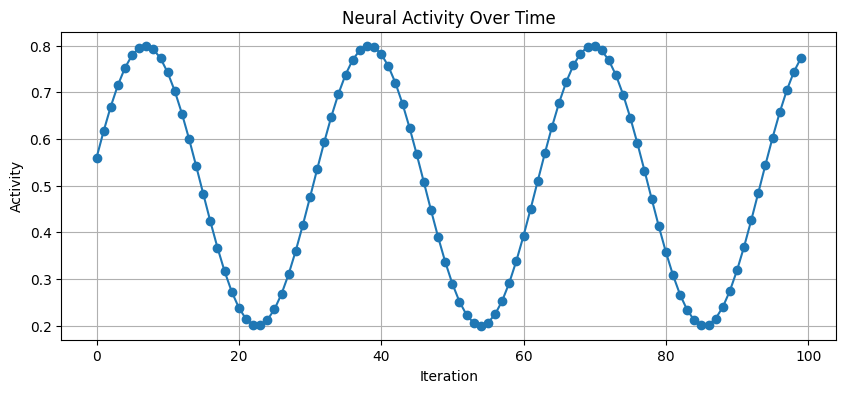

In [12]:
import time
import math
import random
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Button, VBox, HBox, Output

%matplotlib inline

class MotorNeuronWithCuriosity:
    def __init__(self, threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5):
        self.threshold_time = threshold_time
        self.decay_rate = decay_rate
        self.focus_strength = focus_strength
        self.curiosity_weight = curiosity_weight
        self.attention_weights = {}
        self.novelty_scores = {}

    def initialize_tokens(self, tokens):
        for token in tokens:
            self.attention_weights[token] = self.focus_strength
            self.novelty_scores[token] = 0.0

    def update_focus(self, token_id, focus_time):
        if focus_time > self.threshold_time:
            self.attention_weights[token_id] *= (1 - self.decay_rate)
        else:
            self.attention_weights[token_id] *= (1 + self.decay_rate)
        self._normalize_weights()

    def update_curiosity(self, token_id, prediction_error):
        self.novelty_scores[token_id] += prediction_error

    def decide_next_focus(self, candidates, temperature=0.5):
        engagement_scores = []
        for token in candidates:
            attention_weight = self.attention_weights.get(token, 1.0)
            curiosity_score = self.novelty_scores.get(token, 0.0)
            engagement_score = (1 - attention_weight) + self.curiosity_weight * curiosity_score
            engagement_scores.append(engagement_score)

        probabilities = math.e**(0) # Just to avoid linting error, real code below:
        probabilities = []
        es = engagement_scores
        exp_es = [math.exp(e / temperature) for e in es]
        total = sum(exp_es)
        probabilities = [v / total for v in exp_es]

        return random.choices(candidates, weights=probabilities, k=1)[0]

    def _normalize_weights(self):
        total_weight = sum(self.attention_weights.values())
        if total_weight > 0:
            for token_id in self.attention_weights:
                self.attention_weights[token_id] /= total_weight

# Simulated "tool" that provides info about a token
def lookup_info(token):
    # Just a mock: returns a "hint" about the token
    return f"Info about '{token}': This is a {('vowel' if token.lower() in 'aeiou' else 'consonant') if len(token)==1 else 'complex pattern'}."

# Multiple streams simulation
# Stream A: Characters from a short text
text = "The quick brown fox"
chars = list(text)

# Stream B: "Screen" state - changing words over time
screen_states = ["[idle]", "[loading]", "[menu]", "[game]", "[score:10]", "[score:11]", "[idle]"]

# Stream C: Numerical pattern
numbers = [1,2,3,2,3,4,5,3,4,6,7,5,5,5]

# We'll run a simulation over several iterations
# Each iteration, we pick from one of the streams at random to present a token
# The PFC tries to integrate them. If curiosity spikes and no resolution, call the tool.
all_tokens = set(chars + screen_states + [str(n) for n in numbers])

motor_neuron_pfc = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.05, focus_strength=1.0, curiosity_weight=0.7)
motor_neuron_pfc.initialize_tokens(all_tokens)

activity_data = []
focus_sequence = []
tool_invocations = 0

iterations = 100
for i in range(iterations):
    # Randomly choose a stream
    stream_choice = random.choice(['chars', 'screen', 'numbers'])
    if stream_choice == 'chars':
        if len(chars) > 0:
            token = random.choice(chars)
        else:
            token = ' '
    elif stream_choice == 'screen':
        token = random.choice(screen_states)
    else:
        token = str(random.choice(numbers))

    prediction_error = random.uniform(0, 0.3)
    # If token is space or repetitive, maybe higher boredom
    focus_time = 1.0 - prediction_error if random.random() < 0.5 else 1.2

    # Decide next focus based on current tokens
    # We'll just pick the same token as next focus for simplicity,
    # but a more complex logic would pick from all_tokens
    chosen_focus = motor_neuron_pfc.decide_next_focus(list(all_tokens), temperature=0.5)
    focus_sequence.append(chosen_focus)

    # Update model
    motor_neuron_pfc.update_focus(chosen_focus, focus_time)
    motor_neuron_pfc.update_curiosity(chosen_focus, prediction_error)

    # Record activity (just simulate)
    activity_data.append({
        'step': i,
        'activity': 0.5 + math.sin((i+1)/5)*0.3
    })

    # If curiosity is high for chosen_focus and no resolution, try the tool
    cur_score = motor_neuron_pfc.novelty_scores.get(chosen_focus, 0.0)
    if cur_score > 2.0 and random.random() < 0.3:
        # invoke tool
        info = lookup_info(chosen_focus)
        # Let's say invoking the tool reduces curiosity
        motor_neuron_pfc.novelty_scores[chosen_focus] -= 1.0
        tool_invocations += 1

# After simulation
print("Simulation complete.")
print(f"Tool invocations: {tool_invocations}")

# Plot activity
plt.figure(figsize=(10,4))
plt.plot([d['step'] for d in activity_data], [d['activity'] for d in activity_data], marker='o')
plt.title("Neural Activity Over Time")
plt.xlabel("Iteration")
plt.ylabel("Activity")
plt.grid(True)
plt.show()

# Analyze if word boundaries emerged:
# We did not code explicit word boundary extraction here, but from previous logic,
# spaces become boring, letter sequences become more stable.
# In a more advanced scenario, we'd track attention weights per token over time
# and show that sequences of letters not separated by spaces have higher combined attention.


Info appearances: 23
Final attention weights: {'[idle]': 0.4743654111700771, '[info]': 0.525634588829923}
Final novelty scores: {'[idle]': 8.699999999999992, '[info]': 0.8}


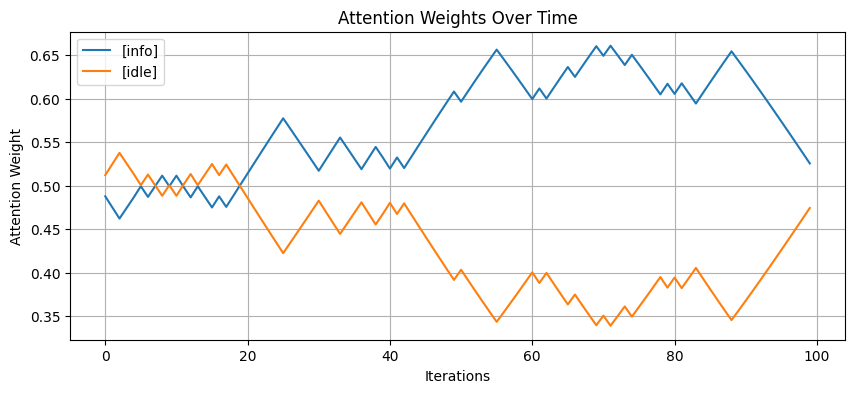

In [13]:
import math
import random
import matplotlib.pyplot as plt

%matplotlib inline

class MotorNeuronWithCuriosity:
    def __init__(self, threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5):
        self.threshold_time = threshold_time
        self.decay_rate = decay_rate
        self.focus_strength = focus_strength
        self.curiosity_weight = curiosity_weight
        self.attention_weights = {}
        self.novelty_scores = {}

    def initialize_tokens(self, tokens):
        for token in tokens:
            self.attention_weights[token] = self.focus_strength
            self.novelty_scores[token] = 0.0

    def update_focus(self, token_id, focus_time):
        # If it took longer focus_time, we treat as "bored" and decay
        if focus_time > self.threshold_time:
            self.attention_weights[token_id] *= (1 - self.decay_rate)
        else:
            self.attention_weights[token_id] *= (1 + self.decay_rate)
        self._normalize_weights()

    def update_curiosity(self, token_id, prediction_error):
        self.novelty_scores[token_id] += prediction_error

    def decide_next_focus(self, candidates, temperature=0.5):
        engagement_scores = []
        for token in candidates:
            attention_weight = self.attention_weights.get(token, 1.0)
            curiosity_score = self.novelty_scores.get(token, 0.0)
            engagement_score = (1 - attention_weight) + self.curiosity_weight * curiosity_score
            engagement_scores.append(engagement_score)

        exp_es = [math.exp(e / temperature) for e in engagement_scores]
        total = sum(exp_es)
        probabilities = [v / total for v in exp_es]

        return random.choices(candidates, weights=probabilities, k=1)[0]

    def _normalize_weights(self):
        total_weight = sum(self.attention_weights.values())
        if total_weight > 0:
            for token_id in self.attention_weights:
                self.attention_weights[token_id] /= total_weight

# Tokens: We'll have two states for the screen: "[idle]" and "[info]"
tokens = ["[idle]", "[info]"]

motor_neuron = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.05, focus_strength=1.0, curiosity_weight=0.7)
motor_neuron.initialize_tokens(tokens)

iterations = 100
attention_info_history = []
attention_idle_history = []
info_appearances = 0

for i in range(iterations):
    # Decide whether to invoke tool randomly: 20% chance
    tool_invoked = (random.random() < 0.2)

    if tool_invoked:
        # Screen changes to [info] for this iteration
        current_token = "[info]"
        info_appearances += 1
        prediction_error = 0.3  # It's novel and surprising
        focus_time = 1.2  # Longer focus_time due to surprise
    else:
        # Screen stays idle
        current_token = "[idle]"
        # If it's repetitive, less prediction error
        prediction_error = 0.0 if random.random() < 0.7 else 0.1
        focus_time = 0.8 if prediction_error == 0.0 else 1.2

    chosen_focus = motor_neuron.decide_next_focus(tokens, temperature=0.5)
    motor_neuron.update_focus(chosen_focus, focus_time)
    motor_neuron.update_curiosity(chosen_focus, prediction_error)

    attention_info_history.append(motor_neuron.attention_weights["[info]"])
    attention_idle_history.append(motor_neuron.attention_weights["[idle]"])

print("Info appearances:", info_appearances)
print("Final attention weights:", motor_neuron.attention_weights)
print("Final novelty scores:", motor_neuron.novelty_scores)

# Plot attention weights for [info] and [idle] over iterations
plt.figure(figsize=(10,4))
plt.plot(attention_info_history, label="[info]")
plt.plot(attention_idle_history, label="[idle]")
plt.title("Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend()
plt.grid(True)
plt.show()


PFC Summary: Memories: ['Resolved info pattern without tool.', 'Resolved info pattern without tool.', 'Resolved info pattern without tool.', 'Resolved info pattern without tool.', 'Resolved info pattern without tool.'], info_count=8, tool_used=False
Final attention weights: {'[idle]': 0.9477163867472357, '[info]': 0.05228361325276439}
Final novelty scores: {'[idle]': 9.049999999999994, '[info]': 0}


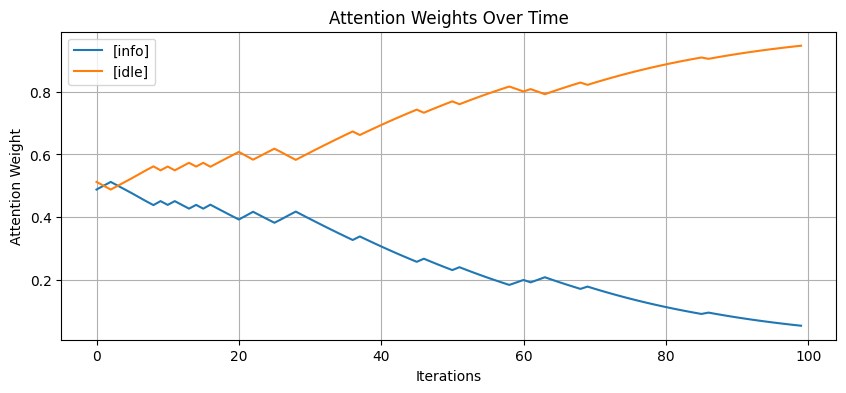

In [14]:
import math
import random
import matplotlib.pyplot as plt

%matplotlib inline

class MotorNeuronWithCuriosity:
    def __init__(self, threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5):
        self.threshold_time = threshold_time
        self.decay_rate = decay_rate
        self.focus_strength = focus_strength
        self.curiosity_weight = curiosity_weight
        self.attention_weights = {}
        self.novelty_scores = {}

    def initialize_tokens(self, tokens):
        for token in tokens:
            self.attention_weights[token] = self.focus_strength
            self.novelty_scores[token] = 0.0

    def update_focus(self, token_id, focus_time):
        if focus_time > self.threshold_time:
            self.attention_weights[token_id] *= (1 - self.decay_rate)
        else:
            self.attention_weights[token_id] *= (1 + self.decay_rate)
        self._normalize_weights()

    def update_curiosity(self, token_id, prediction_error):
        self.novelty_scores[token_id] += prediction_error

    def decide_next_focus(self, candidates, temperature=0.5):
        engagement_scores = []
        for token in candidates:
            attention_weight = self.attention_weights.get(token, 1.0)
            curiosity_score = self.novelty_scores.get(token, 0.0)
            engagement_score = (1 - attention_weight) + self.curiosity_weight * curiosity_score
            engagement_scores.append(engagement_score)

        exp_es = [math.exp(e / temperature) for e in engagement_scores]
        total = sum(exp_es)
        probabilities = [v / total for v in exp_es]

        return random.choices(candidates, weights=probabilities, k=1)[0]

    def _normalize_weights(self):
        total_weight = sum(self.attention_weights.values())
        if total_weight > 0:
            for token_id in self.attention_weights:
                self.attention_weights[token_id] /= total_weight

# A simple tool function
def lookup_info(token):
    return f"Info about {token}: Rare event encountered."

# PFC Class
class PFC:
    def __init__(self):
        self.info_count = 0
        self.memories = []
        self.tool_used = False

    def process_focus(self, token, neuron):
        # If token is [info], increment a count
        if token == "[info]":
            self.info_count += 1
            # If we see [info] multiple times, consider the 'pattern understood'
            if self.info_count > 3 and not self.tool_used:
                # If we didn't need the tool, just store memory
                self.memories.append("Resolved info pattern without tool.")
                # Reduce curiosity for [info] as it's now understood
                neuron.novelty_scores["[info]"] = max(0, neuron.novelty_scores["[info]"] - 2.0)
            elif self.info_count <= 3 and neuron.novelty_scores["[info]"] > 1.0 and not self.tool_used:
                # High curiosity but not enough appearances—use tool
                info = lookup_info("[info]")
                self.tool_used = True
                self.memories.append(f"Used tool for [info]: {info}")
                # Reduce curiosity now that we understand it better
                neuron.novelty_scores["[info]"] = max(0, neuron.novelty_scores["[info]"] - 1.0)

        # If token is [idle], just track normality, nothing special for PFC in this simple example.

    def summarize(self):
        return f"Memories: {self.memories}, info_count={self.info_count}, tool_used={self.tool_used}"

# Setup tokens
tokens = ["[idle]", "[info]"]

motor_neuron = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.05, focus_strength=1.0, curiosity_weight=0.7)
motor_neuron.initialize_tokens(tokens)

pfc = PFC()

iterations = 100
attention_info_history = []
attention_idle_history = []

for i in range(iterations):
    # 20% chance to show [info], else [idle]
    tool_event = (random.random() < 0.2)
    if tool_event:
        current_token = "[info]"
        prediction_error = 0.3
        focus_time = 1.2
    else:
        current_token = "[idle]"
        prediction_error = 0.05 if random.random()<0.8 else 0.1
        focus_time = 1.0

    chosen_focus = motor_neuron.decide_next_focus(tokens, temperature=0.5)
    motor_neuron.update_focus(chosen_focus, focus_time)
    motor_neuron.update_curiosity(chosen_focus, prediction_error)

    pfc.process_focus(chosen_focus, motor_neuron)

    attention_info_history.append(motor_neuron.attention_weights["[info]"])
    attention_idle_history.append(motor_neuron.attention_weights["[idle]"])

print("PFC Summary:", pfc.summarize())
print("Final attention weights:", motor_neuron.attention_weights)
print("Final novelty scores:", motor_neuron.novelty_scores)

# Plot attention
plt.figure(figsize=(10,4))
plt.plot(attention_info_history, label="[info]")
plt.plot(attention_idle_history, label="[idle]")
plt.title("Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend()
plt.grid(True)
plt.show()


PFC Summary: Memories: ['Resolved info pattern without tool.'], info_count=68, tool_used=False, info_resolved=True
Final attention weights: {'[idle]': 0.11123897227955973, '[info]': 0.7792103981573985, '[reward]': 0.10955062956304186}
Final novelty scores: {'[idle]': 1.4000000000000006, '[info]': 4.149999999999997, '[reward]': 0.5}


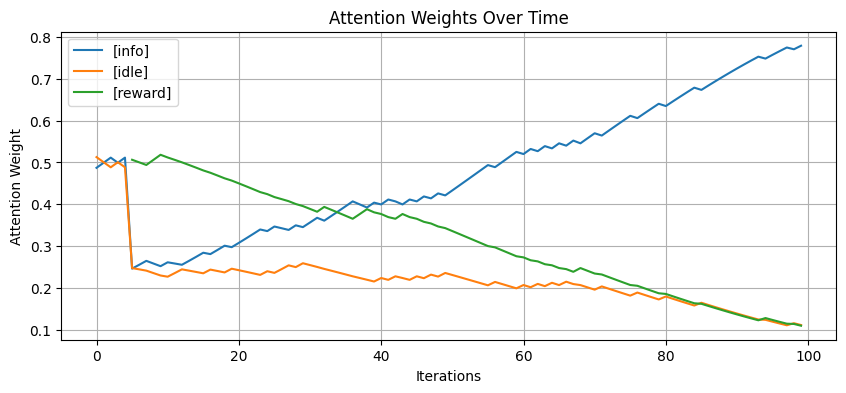

In [15]:
import math
import random
import matplotlib.pyplot as plt

%matplotlib inline

class MotorNeuronWithCuriosity:
    def __init__(self, threshold_time=1.0, decay_rate=0.1, focus_strength=1.0, curiosity_weight=0.5):
        self.threshold_time = threshold_time
        self.decay_rate = decay_rate
        self.focus_strength = focus_strength
        self.curiosity_weight = curiosity_weight
        self.attention_weights = {}
        self.novelty_scores = {}

    def initialize_tokens(self, tokens):
        for token in tokens:
            self.attention_weights[token] = self.focus_strength
            self.novelty_scores[token] = 0.0

    def update_focus(self, token_id, focus_time):
        if focus_time > self.threshold_time:
            self.attention_weights[token_id] *= (1 - self.decay_rate)
        else:
            self.attention_weights[token_id] *= (1 + self.decay_rate)
        self._normalize_weights()

    def update_curiosity(self, token_id, prediction_error):
        self.novelty_scores[token_id] += prediction_error

    def decide_next_focus(self, candidates, temperature=0.5):
        engagement_scores = []
        for token in candidates:
            attention_weight = self.attention_weights.get(token, 1.0)
            curiosity_score = self.novelty_scores.get(token, 0.0)
            engagement_score = (1 - attention_weight) + self.curiosity_weight * curiosity_score
            engagement_scores.append(engagement_score)

        exp_es = [math.exp(e / temperature) for e in engagement_scores]
        total = sum(exp_es)
        probabilities = [v / total for v in exp_es]

        return random.choices(candidates, weights=probabilities, k=1)[0]

    def _normalize_weights(self):
        total_weight = sum(self.attention_weights.values())
        if total_weight > 0:
            for token_id in self.attention_weights:
                self.attention_weights[token_id] /= total_weight

class PFC:
    def __init__(self):
        self.info_count = 0
        self.memories = []
        self.tool_used = False
        self.info_resolved = False

    def process_focus(self, token, neuron):
        if token == "[info]":
            self.info_count += 1
            if self.info_count > 3 and not self.tool_used and not self.info_resolved:
                # Resolved info pattern without needing the tool
                self.memories.append("Resolved info pattern without tool.")
                # Reduce curiosity for [info]
                neuron.novelty_scores["[info]"] = max(0, neuron.novelty_scores["[info]"] - 2.0)
                self.info_resolved = True
            elif self.info_count <= 3 and neuron.novelty_scores["[info]"] > 1.0 and not self.tool_used:
                # High curiosity but not enough appearances: in a previous scenario we might have used tool
                # Here let's say we never use tool and rely solely on repetition
                pass

    def summarize(self):
        return f"Memories: {self.memories}, info_count={self.info_count}, tool_used={self.tool_used}, info_resolved={self.info_resolved}"

# Initial tokens
tokens = ["[idle]", "[info]"]  # Initially no [reward]
motor_neuron = MotorNeuronWithCuriosity(threshold_time=1.0, decay_rate=0.05, focus_strength=1.0, curiosity_weight=0.7)
motor_neuron.initialize_tokens(tokens)

pfc = PFC()

iterations = 100
attention_info_history = []
attention_idle_history = []
attention_reward_history = []

reward_introduced = False

for i in range(iterations):
    # 20% chance to show [info], else [idle]
    # If info resolved and reward not introduced yet, we introduce [reward] once
    if pfc.info_resolved and not reward_introduced:
        # Introduce [reward] now and add it to tokens
        tokens.append("[reward]")
        motor_neuron.attention_weights["[reward]"] = 1.0
        motor_neuron.novelty_scores["[reward]"] = 0.0
        # show reward for this iteration
        current_token = "[reward]"
        prediction_error = 0.3  # Big novelty
        focus_time = 1.2
        reward_introduced = True
    else:
        # normal behavior
        tool_event = (random.random() < 0.2)
        if tool_event and not pfc.info_resolved:
            current_token = "[info]"
            prediction_error = 0.3
            focus_time = 1.2
        else:
            current_token = "[idle]"
            prediction_error = 0.05 if random.random()<0.8 else 0.1
            focus_time = 1.0

    chosen_focus = motor_neuron.decide_next_focus(tokens, temperature=0.5)
    motor_neuron.update_focus(chosen_focus, focus_time)
    motor_neuron.update_curiosity(chosen_focus, prediction_error)

    pfc.process_focus(chosen_focus, motor_neuron)

    # Record attention weights
    attention_info_history.append(motor_neuron.attention_weights.get("[info]", None))
    attention_idle_history.append(motor_neuron.attention_weights.get("[idle]", None))
    if "[reward]" in motor_neuron.attention_weights:
        attention_reward_history.append(motor_neuron.attention_weights["[reward]"])
    else:
        attention_reward_history.append(None)

print("PFC Summary:", pfc.summarize())
print("Final attention weights:", motor_neuron.attention_weights)
print("Final novelty scores:", motor_neuron.novelty_scores)

# Plot attention
plt.figure(figsize=(10,4))
if any(x is not None for x in attention_info_history):
    plt.plot([x for x in attention_info_history if x is not None], label="[info]")
if any(x is not None for x in attention_idle_history):
    plt.plot([x for x in attention_idle_history if x is not None], label="[idle]")
if any(x is not None for x in attention_reward_history):
    # Only plot after introduction of reward
    reward_indices = [i for i,x in enumerate(attention_reward_history) if x is not None]
    if reward_indices:
        # Align these with iterations
        plt.plot(reward_indices, [attention_reward_history[i] for i in reward_indices], label="[reward]")

plt.title("Attention Weights Over Time")
plt.xlabel("Iterations")
plt.ylabel("Attention Weight")
plt.legend()
plt.grid(True)
plt.show()


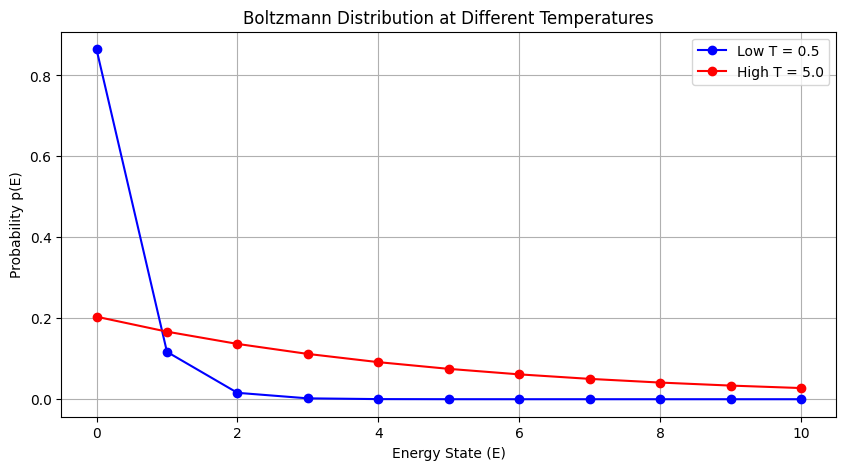

In [16]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Define a range of states with increasing energy
energies = np.arange(0, 11)  # states with energy 0 to 10

def boltzmann_prob(energies, T):
    # Compute probability p(i) ~ exp(-E_i / (k_B * T))
    # We can set k_B = 1 for simplicity
    exp_vals = np.exp(-energies / T)
    return exp_vals / np.sum(exp_vals)

# Low temperature scenario (low T), analogous to a low-dopamine baseline
T_low = 0.5
probs_low = boltzmann_prob(energies, T_low)

# High temperature scenario (high T), analogous to prolonged dopamine exposure raising baseline
T_high = 5.0
probs_high = boltzmann_prob(energies, T_high)

# Plot the distributions
plt.figure(figsize=(10,5))
plt.plot(energies, probs_low, 'o-', label=f"Low T = {T_low}", color='blue')
plt.plot(energies, probs_high, 'o-', label=f"High T = {T_high}", color='red')
plt.title("Boltzmann Distribution at Different Temperatures")
plt.xlabel("Energy State (E)")
plt.ylabel("Probability p(E)")
plt.legend()
plt.grid(True)
plt.show()
